<h1 style="color:rgb(0,120,170)">Neural Networks and Deep Learning</h1>
<h2 style="color:rgb(0,120,170)">Intro to Tensor Flow and Keras - simple model</h2>


In [1]:
#!pip install -U tensorflow tensorboard

In [2]:
import os
import sys
import re
import time
import datetime
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorboard.plugins.hparams import api_pb2
from tensorboard.plugins.hparams import summary as hparams_summary

from google.protobuf import struct_pb2

%load_ext tensorboard
%matplotlib inline

2022-08-27 00:12:55.730116: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-27 00:12:55.730133: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
print(tf.__version__)
try:
    physical_devices = tf.config.list_physical_devices('GPU') 
    #tf.config.experimental.set_memory_growth(physical_devices[0], True)
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)
    print(physical_devices)
except:
    print("No GPU")

2.9.1
[]


2022-08-27 00:12:56.947007: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-27 00:12:56.947218: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-27 00:12:56.947268: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-08-27 00:12:56.947314: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-08-27 00:12:56.947360: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [4]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

First we'll develop a small ANN with Keras:

In [5]:
# load pima indians dataset
dataset = np.loadtxt("../../../data/pima-indians-diabetes.csv", delimiter=",")

In [6]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [7]:
X.shape

(768, 8)

In [8]:
#https://www.tensorflow.org/api_docs/python/tf/keras/layers
#https://www.tensorflow.org/api_docs/python/tf/keras/activations
#https://www.tensorflow.org/api_docs/python/tf/keras/initializers
#https://www.tensorflow.org/api_docs/python/tf/keras/losses
#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
#https://www.tensorflow.org/api_docs/python/tf/keras/metrics

# Create model
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(8, activation="relu", kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer="uniform"))

2022-08-27 00:12:56.977482: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Fit the model
history = model.fit(X, Y, validation_split=0.20, epochs=400, batch_size=64, verbose=1)

Epoch 1/400
10/10 [==============================] - 0s 13ms/step - loss: 0.6860 - accuracy: 0.6531 - val_loss: 0.6807 - val_accuracy: 0.6429
Epoch 2/400
10/10 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.6531 - val_loss: 0.6731 - val_accuracy: 0.6429
Epoch 3/400
10/10 [==============================] - 0s 3ms/step - loss: 0.6676 - accuracy: 0.6531 - val_loss: 0.6705 - val_accuracy: 0.6429
Epoch 4/400
10/10 [==============================] - 0s 4ms/step - loss: 0.6621 - accuracy: 0.6531 - val_loss: 0.6707 - val_accuracy: 0.6429
Epoch 5/400
10/10 [==============================] - 0s 3ms/step - loss: 0.6577 - accuracy: 0.6531 - val_loss: 0.6697 - val_accuracy: 0.6429
Epoch 6/400
10/10 [==============================] - 0s 3ms/step - loss: 0.6548 - accuracy: 0.6531 - val_loss: 0.6678 - val_accuracy: 0.6429
Epoch 7/400
10/10 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.6531 - val_loss: 0.6672 - val_accuracy: 0.6429
Epoch 8/400


In [12]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


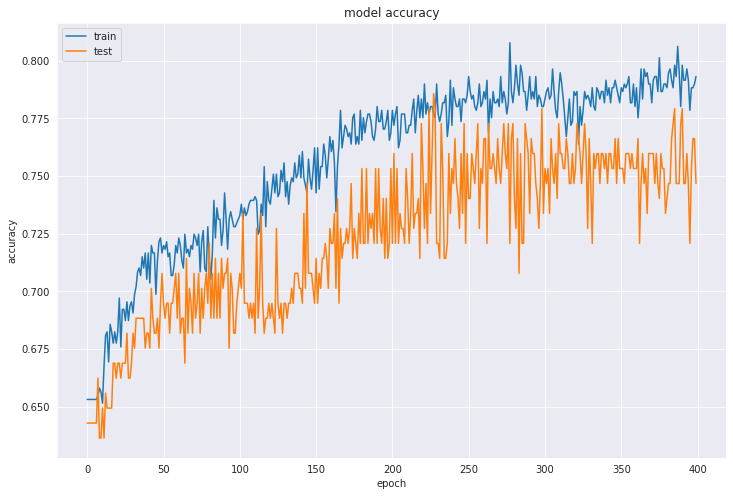

In [13]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

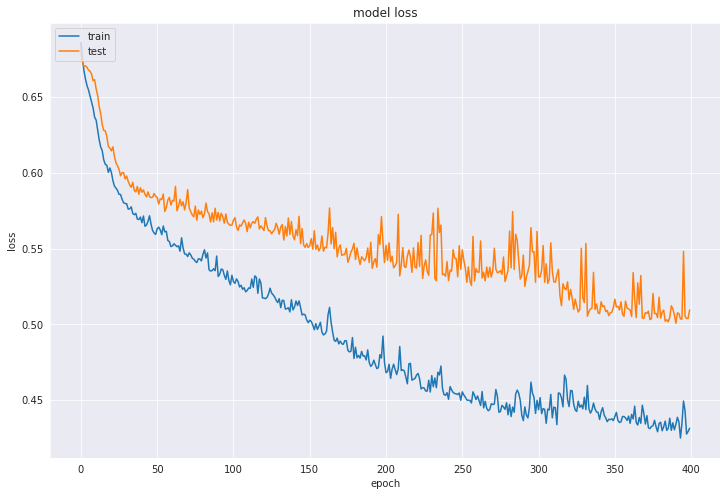

In [14]:
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n{}: {}".format(model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 957us/step - loss: 0.4410 - accuracy: 0.7839

accuracy: 78.38541865348816


In [16]:
# calculate predictions
predictions = model.predict(X)
rounded = [round(x[0]) for x in predictions]

for pred in list(zip(predictions[0:10], rounded[0:10])):
    print(pred)

24/24 [==============================] - 0s 745us/step
(array([0.64257795], dtype=float32), 1)
(array([0.06228373], dtype=float32), 0)
(array([0.82430625], dtype=float32), 1)
(array([0.04572436], dtype=float32), 0)
(array([0.79080683], dtype=float32), 1)
(array([0.16764565], dtype=float32), 0)
(array([0.10142414], dtype=float32), 0)
(array([0.4647574], dtype=float32), 0)
(array([0.935328], dtype=float32), 1)
(array([0.01648607], dtype=float32), 0)
